In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [36]:
data = pd.read_csv('Housing.csv')
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [46]:
data.info()
print()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB



In [45]:
data.isna().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [10]:
#Converting categorical data to numerical using binary values and one hot encoding
df_encoded = pd.get_dummies(data, columns=['furnishingstatus'])
df_encoded = pd.get_dummies(df_encoded, columns=['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus_furnished', 'furnishingstatus_semi-furnished', 'furnishingstatus_unfurnished'], dtype=int, drop_first=True)
df_encoded.head()

,price,area,bedrooms,bathrooms,stories,parking,mainroad_ecoded,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_furnished_True,furnishingstatus_semi-furnished_True,furnishingstatus_unfurnished_True
0,13300000,7420,4,2,3,2,1,1,0,0,0,1,1,1,0,0
1,12250000,8960,4,4,4,3,1,1,0,0,0,1,0,1,0,0
2,12250000,9960,3,2,2,2,1,1,0,1,0,0,1,0,1,0
3,12215000,7500,4,2,2,3,1,1,0,1,0,1,1,1,0,0
4,11410000,7420,4,1,2,2,1,1,1,1,0,1,0,1,0,0


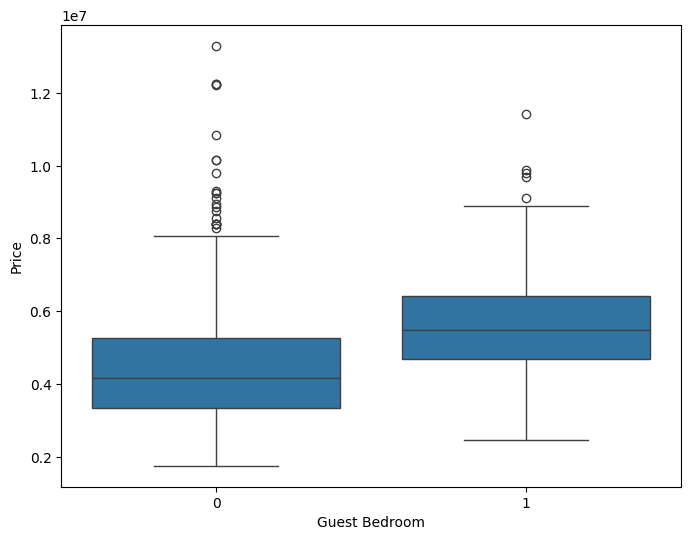

In [14]:

plt.figure(figsize=(8,6))
sns.boxplot(x='guestroom_yes', y='price', data=df_encoded)
plt.xlabel('Guest Bedroom')
plt.ylabel('Price')
plt.show()

In [39]:
# Training and testing data setup
y = df_encoded.iloc[:, 0]
X = df_encoded.iloc[:, 1:]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=10)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Prediction using test features
y_pred = model.predict(X_test)


In [41]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

rmse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f'The rmse is {rmse} and the r^2 value is {r_squared}')
print(f'The coefficient of the features are : {model.coef_}')

The rmse is 751120837689.0983 and the r^2 value is 0.7258808321964791
The coefficient of the features are : [ 2.33293736e+02  1.31262024e+05  9.37898499e+05  4.62770876e+05
  2.81361457e+05  2.27125389e+05  2.27125389e+05  2.88470539e+05
  4.22534519e+05  8.51115291e+05  8.91133940e+05  6.92045082e+05
  1.61983741e+05  1.11972228e+05 -2.73955968e+05]
689990.6853398212
